# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Read Data

In [2]:
path: str = "/home/philko/Documents/Uni/WiSe2223/Consulting/mlw-consulting-project/data/processed/test_predictions_swin_gpt2_aug_abl_index.xlsx"
path_train = '/home/philko/Documents/Uni/WiSe2223/Consulting/mlw-consulting-project/data_train.json'

In [3]:
df_train = pd.read_json(path_train)
df = pd.read_excel(path)

# Merge Data

In [4]:
df_tmp = df_train.groupby('lemma', as_index=True).count().reset_index().rename(columns={'id': 'n'})
all = pd.merge(df, df_tmp, left_on="Label", right_on="lemma", how='outer')

# Prepare Data

In [5]:
all_test = all[all['Correct'].notna()].copy()
all_test['n'] = all_test['n'].fillna(0)
all_test.n = all_test.n.astype(int)
all_test.Correct = all_test.Correct.astype(bool)
plot_data = all_test[all_test['n'] <= 10].copy()

# Plot

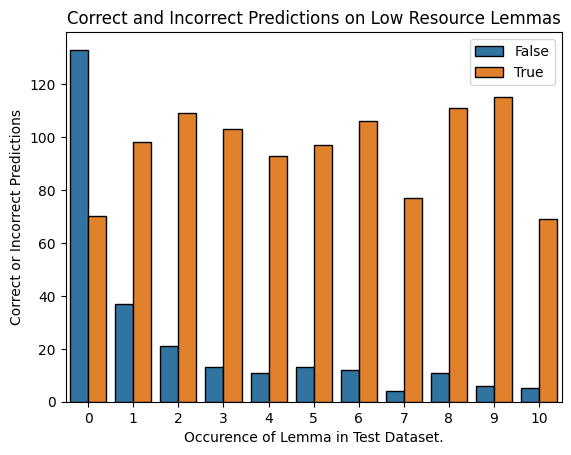

In [6]:
sns.countplot(data=plot_data, x="n", hue="Correct", edgecolor = "black")
plt.xlabel("Occurence of Lemma in Test Dataset.")
plt.ylabel("Correct or Incorrect Predictions")
plt.title("Correct and Incorrect Predictions on Low Resource Lemmas")
plt.legend()
plt.show()